# 75.06/95.58 Organización de Datos
# Primer Cuatrimestre de 2018
# Trabajo Práctico # 1
                                                                                            
                                                                                            
                                                                                            Alumnos 
                                                                                            (Modalidad Oyente): 
                                                                                            
                                                                                            Mariano Vázquez
                                                                                            Leandro Rios
                                                                                            Luis Velázquez Perta


## Introducción y objetivos

Este trabajo propone un análisis exploratorio realizado sobre datos del registro histórico de avisos de búsquedas laborales en https://www.zonajobs.com.ar.

Las motivaciones del mismo son múltiples: 

El primer objetivo consiste en obtener información de los datos puestos a nuestra disposición, la cual permita mejorar el servicio de Zonajobs a sus clientes (empresas y postulantes en búsqueda de empleos) mediante la propuesta de soluciones "data-driven". 
Para esto, realizaremos una exploración general del set de datos, donde describiremos características generales de los usuarios, los avisos de empleo que se les ofertan, y algunas relaciones entre los mismos; seguido, propondremos hipótesis que serán testeadas, o guiarán el rumbo a siguientes trabajos que requieran nuevos o mayor cantidad de datos, u otros recursos (tiempo, herramientas) que excedan al alcance del presente. 

El segundo objetivo, de orden más personal para los autores, consiste en familiarizarse con las técnicas y herramientas necesarias para realizar el análisis, tanto desde el punto de vista tecnológico y técnico('Python', 'Pandas', 'Jupyter', etc.) como desde el punto de vista del dominio (conocimiento del negocio).


Los datos utilizados se encuentran disponibles en https://goo.gl/BJwbn3

 Sets de datos y 
  breve descripción:

  fiuba_1_postulantes_educacion.csv
   Nivel educativo de los postulantes
        
  fiuba_2_postulantes_genero_y_edad.csv
   Fecha de nacimiento y genero de los postulantes
        
  fiuba_3_vistas.csv
   Vistas de avisos online y offline
       
  fiuba_4_postulaciones.csv
   Postulaciones hasta el 1ro de marzo 2018
        
  fiuba_5_avisos_online.csv
   Avisos online al 8 de marzo de 2018
       
  fiuba_6_avisos_detalle.csv
   Detalle de avisos vistos y postulados tanto offline como online


Importamos las librerías necesarias:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import datetime as DT

%matplotlib inline

### Exploramos el primer set de datos disponible: Nivel educativo de los postulantes
    
De ahora en más, para cada uno de ellos, realizamos una breve inspección visual, de su estructura, y la presencia de datos       ausentes o duplicados. 

In [66]:
postulantes_educacion = pd.read_csv('Data/fiuba_1_postulantes_educacion.csv')

In [67]:
print(postulantes_educacion.shape)
print(postulantes_educacion.info())
print(postulantes_educacion.head(3))

(298231, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB
None
  idpostulante         nombre    estado
0         NdJl       Posgrado  En Curso
1         8BkL  Universitario  En Curso
2         1d2B  Universitario  En Curso


In [68]:
#Renombramos columnas
postulantes_educacion = postulantes_educacion.rename(columns={'nombre': 'educacion', 'estado': 'estado'})

In [69]:
postulantes_educacion.isnull().sum(axis=0)

idpostulante    0
educacion       0
estado          0
dtype: int64

In [70]:
postulantes_educacion.describe()

,idpostulante,educacion,estado
count,298231,298231,298231
unique,188752,7,3
top,YlMLGD,Secundario,Graduado
freq,9,110256,194474


No se observan datos nulos pero si observamos que la columna de 'idpostulante' presenta una gran cantidad de valores repetidos; luego de una exploración visual, vemos que se trata de mismas personas que han cargado distintos niveles educativos (quizá coexistentes, quizá a modo de cronología). A fines de nuestro análisis, nos importa quedarnos con un único valor y reflejar el máximo estadío de 
educación alcanzado por la persona, por lo cual determinamos un orden - con cierto grado de arbitrariedad en la escala - y 
desechamos los registros correspondientes a duplicados donde el nivel educativo no es el máximo en nuestra escala para 
la persona en cuestión.

In [71]:
postulantes_educacion['educacion_estado']=\
postulantes_educacion['educacion'].astype(str)+'_'+postulantes_educacion['estado']
postulantes_educacion.head(3)

,idpostulante,educacion,estado,educacion_estado
0,NdJl,Posgrado,En Curso,Posgrado_En Curso
1,8BkL,Universitario,En Curso,Universitario_En Curso
2,1d2B,Universitario,En Curso,Universitario_En Curso


Diseñamos un dataset auxiliar con las categorías de educación y estado ordenadas, y anexamos esta información al dataset original.

In [72]:
categorias = pd.read_csv('Data/fiuba_1_categorias.csv', encoding='latin-1')  # el archivo tiene lineas con header incluido

In [73]:
categorias.head(5)

,educacion_estado,valor
0,Doctorado_Graduado,1
1,Doctorado_En Curso,2
2,Doctorado_Abandonado,3
3,Master_Graduado,4
4,Master_En Curso,5


In [74]:
postulantes_educacion= postulantes_educacion.merge(categorias,on='educacion_estado',how='inner')
postulantes_educacion= pd.DataFrame(postulantes_educacion)
print(postulantes_educacion.shape)
print(type(postulantes_educacion))
print(postulantes_educacion.head())

(298231, 5)
<class 'pandas.core.frame.DataFrame'>
  idpostulante educacion    estado   educacion_estado  valor
0         NdJl  Posgrado  En Curso  Posgrado_En Curso      8
1        axaPJ  Posgrado  En Curso  Posgrado_En Curso      8
2        6bK4l  Posgrado  En Curso  Posgrado_En Curso      8
3        aJ5N5  Posgrado  En Curso  Posgrado_En Curso      8
4        Z48mz  Posgrado  En Curso  Posgrado_En Curso      8


In [75]:
postulantes_educacionGB = postulantes_educacion.groupby(['idpostulante'], as_index=False)
agg_pos_edu= postulantes_educacionGB.agg({'valor' :np.min})
print(agg_pos_edu.shape)
print(agg_pos_edu.head())

(188752, 2)
  idpostulante  valor
0      0z5VvGv     16
1      0zB026d     13
2      0zB03O9     14
3      0zB08lq     16
4      0zB0NWY     10


In [76]:
postulantes_educacion = pd.merge(agg_pos_edu,postulantes_educacion, on=['idpostulante', 'valor'],how='left')
postulantes_educacion.drop('valor',axis=1,inplace=True)
print (postulantes_educacion.shape)
print(postulantes_educacion.head())
print(type(postulantes_educacion))

(188752, 4)
  idpostulante          educacion    estado            educacion_estado
0      0z5VvGv         Secundario  Graduado         Secundario_Graduado
1      0zB026d  Terciario/Técnico  Graduado  Terciario/Técnico_Graduado
2      0zB03O9  Terciario/Técnico  En Curso  Terciario/Técnico_En Curso
3      0zB08lq         Secundario  Graduado         Secundario_Graduado
4      0zB0NWY      Universitario  Graduado      Universitario_Graduado
<class 'pandas.core.frame.DataFrame'>


In [77]:
postulantes_educacion.describe()

,idpostulante,educacion,estado,educacion_estado
count,188752,188752,188752,188752
unique,188752,7,3,21
top,0zkvLj8,Universitario,Graduado,Secundario_Graduado
freq,1,87838,109261,56333


Donde se observa que ahora si idpostulante es una clave unica

## Exploramos el segundo set de datos disponibles: Fecha de nacimiento y género de los postulantes

In [78]:
postulantes_genero_y_edad = pd.read_csv('Data/fiuba_2_postulantes_genero_y_edad.csv' ) 

In [79]:
print(postulantes_genero_y_edad.shape)
print(postulantes_genero_y_edad.info())
print(postulantes_genero_y_edad.head(3))

(200888, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB
None
  idpostulante fechanacimiento sexo
0         NM5M      1970-12-03  FEM
1         5awk      1962-12-04  FEM
2         ZaO5      1978-08-10  FEM


In [80]:
print(postulantes_genero_y_edad.isnull().sum(axis=0))
print(postulantes_genero_y_edad[postulantes_genero_y_edad.isnull().any(axis=1)].head(5))

idpostulante          0
fechanacimiento    4750
sexo                  0
dtype: int64
     idpostulante fechanacimiento        sexo
930        NM1J0z             NaN        MASC
1377       Z8warE             NaN  NO_DECLARA
2149       Nzj9lz             NaN  NO_DECLARA
2435       ZD5wXR             NaN        MASC
3413       8bdWrW             NaN        MASC


El número de postulantes sin dato de fecha de nacimiento (4750), si bien es elevado, no parece ser motivo de preocupación en proporción a la totalidad de los datos (200888).

In [81]:
postulantes_genero_y_edad.describe()

,idpostulante,fechanacimiento,sexo
count,200888,196138,200888
unique,200888,15027,3
top,jkdQOE0,1994-05-24,FEM
freq,1,57,101981


Calculamos la edad de los postulantes en base a su fecha de nacimiento:

In [82]:
postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(postulantes_genero_y_edad['fechanacimiento'], format="%Y-%m-%d", errors='coerce')
now = pd.Timestamp(DT.datetime.now())
postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(postulantes_genero_y_edad['fechanacimiento'], format="%Y-%m-%d", errors='coerce')    
postulantes_genero_y_edad['edad'] = (now - postulantes_genero_y_edad['fechanacimiento']).astype('timedelta64[Y]') 
postulantes_genero_y_edad.head(5)

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,47.0
1,5awk,1962-12-04,FEM,55.0
2,ZaO5,1978-08-10,FEM,39.0
3,NdJl,1969-05-09,MASC,48.0
4,eo2p,1981-02-16,MASC,37.0


In [83]:
postulantes_genero_y_edad.isnull().sum(axis=0)

idpostulante          0
fechanacimiento    4757
sexo                  0
edad               4757
dtype: int64

Notamos la aparición de 7 nuevos datos faltantes en 'fechanacimiento'. Siendo una cantidad menor, y ante el conocimiento de     que Pandas excluirá dichos casos de cualquier análisis, hacemos caso omiso a ellos.

Ahora Unimos ambas tablas con datos sobre los postulantes, para establecer relaciones entre sus columnas; lo hacemos mediante un 'outer join', conservando filas pese a valores de 'ID' no cruzados entre las tablas.

In [84]:
postulantes = postulantes_educacion.merge(postulantes_genero_y_edad,on='idpostulante',how='outer')

In [85]:
print(postulantes.shape)
postulantes.head(3)

(200888, 7)


,idpostulante,educacion,estado,educacion_estado,fechanacimiento,sexo,edad
0,0z5VvGv,Secundario,Graduado,Secundario_Graduado,1987-10-18,MASC,30.0
1,0zB026d,Terciario/Técnico,Graduado,Terciario/Técnico_Graduado,1978-02-23,FEM,40.0
2,0zB03O9,Terciario/Técnico,En Curso,Terciario/Técnico_En Curso,1987-07-04,FEM,30.0


Observamos que el nuevo dataset ('Postulantes'), presenta la misma dimensión en filas que la tabla con datos de género y edad. 

In [86]:
postulantes.isnull().sum(axis=0)

idpostulante            0
educacion           12136
estado              12136
educacion_estado    12136
fechanacimiento      4757
sexo                    0
edad                 4757
dtype: int64

La cantidad de datos faltantes en las columnas referidas al nivel educativo se deben al Join entre los sets de datos originales que componen a 'Postulantes': existen IDs para los cuáles contamos con datos de fecha de nacimiento y género, no así con datos de nivel educativo.

Realizamos un análisis del nivel educativo de los postulantes a nivel general, y visualizamos a niveles relativos:

In [87]:
postulantes.head(3)

,idpostulante,educacion,estado,educacion_estado,fechanacimiento,sexo,edad
0,0z5VvGv,Secundario,Graduado,Secundario_Graduado,1987-10-18,MASC,30.0
1,0zB026d,Terciario/Técnico,Graduado,Terciario/Técnico_Graduado,1978-02-23,FEM,40.0
2,0zB03O9,Terciario/Técnico,En Curso,Terciario/Técnico_En Curso,1987-07-04,FEM,30.0


Veamos como es la distribución del nivel de educación de los postulantes

In [88]:
Distr_educativa_post = postulantes['educacion'].value_counts(normalize=True)
Distr_educativa_post

Universitario        0.465362
Secundario           0.330651
Terciario/Técnico    0.145318
Posgrado             0.032053
Master               0.018410
Otro                 0.007089
Doctorado            0.001118
Name: educacion, dtype: float64

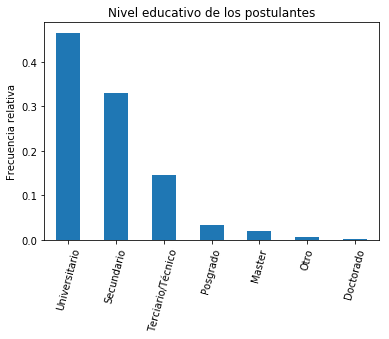

In [89]:
Distr_educativa_post.plot.bar(title='Nivel educativo de los postulantes',rot=75, legend=False)  
plt.ylabel('Frecuencia relativa')

Observamos que el nivel educativo predominante, sin tener en cuenta el estado (graduado/abandonado/terminado) alcanzado, es     el Universitario, seguido en menor proporción por postulantes en nivel secundario o terciario/técnico.
    Para mayor detalle, combinamos el nivel educativo y el estado de avance de los estudios y volvemos a generar la                 visualización. 

Secundario_Graduado           0.298450
Universitario_En Curso        0.247335
Universitario_Graduado        0.165604
Terciario/Técnico_Graduado    0.077695
Universitario_Abandonado      0.052423
Name: educacion_estado, dtype: float64


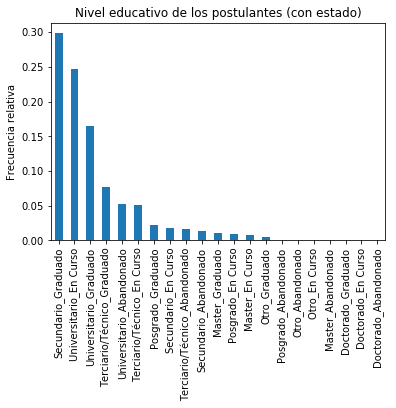

In [90]:
Distr_educativa_post_new = postulantes['educacion_estado'].value_counts(normalize=True)
print(Distr_educativa_post_new.head(5))

Distr_educativa_post_new.plot.bar(title='Nivel educativo de los postulantes (con estado)',rot=90, legend=False)
plt.ylabel('Frecuencia relativa')

Aquí observamos con más claridad el perfil educativo de los postulantes, y podemos ver que quienes predominan en la búsqueda laboral en el sitio son aquellos con máximo nivel alcanzado de secundario completo, y universitario en curso y graduado; estas tres categorías agregan más del 70% de los perfiles.

Luego de obtener el perfil educativo de los postulantes, nos interesa saber también la edad de los usuarios, para lo cual realizamos una visualización de su distribución etaria; allí vemos que la mayor parte de los postulantes se encuentran entre los 20 y 35 años.

Teniendo en cuenta el perfil educativo y edad de los consumidores, y teniendo en cuenta sus hábitos de consumo, recomendamos a Zonajobs considerar la opción de desarrollar una aplicación para teléfonos móviles, la cual entendemos, los acercaría más a su consumidor promedio y a su vez les permitiría generar alertas y obtener datos que de forma más sencilla.

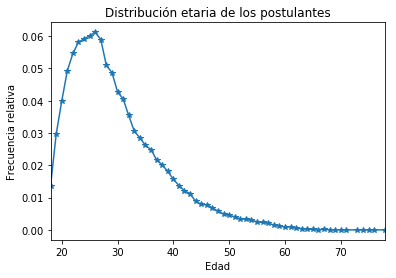

In [91]:
edadPostulantesNorm= postulantes[(postulantes['edad']>= 18) & (postulantes['edad']<= 90)]
edadPostulantesNorm= edadPostulantesNorm['edad'].value_counts(normalize= True)
edadPostulantesNorm = edadPostulantesNorm.sort_index()
edadPostulantesNorm.plot.line(title="Distribución etaria de los postulantes", marker= "*")

plt.ylabel('Frecuencia relativa')
plt.xlabel('Edad')

Ante la presencia de valores nulos tanto en las variables 'Sexo' como 'edad', planteamos el interrogante de la existencia de     alguna interacción entre dichos casos; intentamos entender si tiene sentido preguntarnos la posibilidad de que algun género     se sienta más 'presionado' a no informar su edad, respecto al otro. 
    Verificamos nuestro supuesto mediante una tabla de doble entrada:

In [92]:
postulantes['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [93]:
postulantes['edad'].isnull().value_counts()

False    196131
True       4757
Name: edad, dtype: int64

In [94]:
pd.crosstab(postulantes['sexo'],postulantes['edad'].isnull(),rownames=['Sexo declarado'],colnames=['No declara edad'])

No declara edad,False,True
Sexo declarado,,
FEM,101674,307
MASC,94013,326
NO_DECLARA,444,4124


In [95]:
aux= pd.crosstab(postulantes['sexo'],postulantes['fechanacimiento'].isnull(),rownames=['Sexo declarado'],colnames=['No declara edad'])
aux= aux.div(aux.sum(1),0)
aux.round(decimals=3)
aux

No declara edad,False,True
Sexo declarado,,
FEM,0.996990,0.003010
MASC,0.996544,0.003456
NO_DECLARA,0.097198,0.902802


En la tabla anterior podemos observar que, entre quienes declaran su sexo, una proporción muy menor y pareja entre ambos         decide no declarar su edad; por otro lado, más del 90% de quienes no declaran su edad, tampoco lo hacen con su sexo.
    Concluimos que no existen presiones diferenciales respecto a la declaración de edad para los distintos sexos, o que en caso     de suceder, vienen acompañados de una reserva respecto al propio sexo. 

## Exploramos el tercer set de datos disponibles: Vistas de avisos online y offline

En este dataset nos adentramos ya en la relación existente entre avisos, las vistas de sus postulantes, y la ubicación           temporal de las mismas. En base a esto, intentamos encontrar patrones de comportamiento de los usuarios respecto a los           momentos de mayor utilización de la plataforma de búsquedas. 
    Previo a esto, analizamos estructura, presencia de datos faltantes, duplicados, y las transformaciones necesarias para el       mencionado análisis:

In [96]:
vistas = pd.read_csv('Data/fiuba_3_vistas.csv')

In [97]:
print(vistas.shape)
vistas.head(3)

(961897, 3)


,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd


In [98]:
#renombramos a timestamp_vistas
vistas = vistas.rename(columns={'timestamp': 'fechavista'})
vistas.head(1)

,idAviso,fechavista,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z


In [99]:
vistas.isnull().sum(axis=0)

idAviso         0
fechavista      0
idpostulante    0
dtype: int64

In [100]:
vistas['fechavista']= pd.to_datetime(vistas['fechavista'], errors='coerce') 
vistas.isnull().sum(axis=0)

idAviso         0
fechavista      0
idpostulante    0
dtype: int64

No hay datos nulos y las fechas fueron todas bien formateadas (interpretadas).

In [101]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
fechavista      961897 non-null datetime64[ns]
idpostulante    961897 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.0+ MB


In [102]:
vistas['idAviso'].astype('object').describe()

count         961897
unique          7458
top       1112363488
freq            4169
Name: idAviso, dtype: int64

In [103]:
vistas['year']  = vistas['fechavista'].dt.year
vistas['month'] = vistas['fechavista'].dt.month
vistas['day']   = vistas['fechavista'].dt.day
vistas['hour']  = vistas['fechavista'].dt.hour
vistas['dow']   = vistas['fechavista'].dt.dayofweek
vistas['dayString'] = vistas['fechavista'].dt.weekday_name

diasDic = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}
vistas['diaString'] = vistas['dow'].apply(lambda x: diasDic[x])

In [104]:
vistas.tail(3)

,idAviso,fechavista,idpostulante,year,month,day,hour,dow,dayString,diaString
961894,1112362644,2018-03-01 04:59:46.181,owzLD43,2018,3,1,4,3,Thursday,Jueves
961895,1112305277,2018-03-01 04:59:52.754,A3DraY1,2018,3,1,4,3,Thursday,Jueves
961896,1112345900,2018-03-01 04:59:55.409,ekmNzBW,2018,3,1,4,3,Thursday,Jueves


In [105]:
hora_vistas = vistas['hour'].value_counts(normalize=True)
hora_vistas = hora_vistas.sort_index()
type(hora_vistas)

pandas.core.series.Series

Luego de realizar todas las verificaciones y transformaciones necesarias, nos disponemos a estudiar el comportamiento respecto a       vistas de los postulantes.
    
Las conclusiones obtenidas fueron las siguientes:
- Las búsquedas y vistas siguen un patrón claro a través del día: las mismas tienen un pico que comienza por la media mañana       con su punto máximo pasado el mediodía, con una baja pronunciada después de las 14 - 15 hs. Esto posiblemente se explique por       todas aquellas personas empleadas que utilizan su horario de almuerzo para realizar búsquedas; finalizado la jornada             laboral promedio (17 a 19 hs.), se vuelve a generar otro pico ahora menos pronunciado, el cual decae al adentrarse la noche.
  Este segundo pico no se genera los fines de semana, sino que al contrario, la actividad decae con la misma fuerza con la         que asciende durante la semana. 
- En cuanto al comportamiento a traves de los días de la semana, nos vemos sorprendidos al observar un desbalance de gran         magnitud en la actividad entre días; la búsqueda es entre 3 y 4 veces más intensa los primeros tres días de la semana           (contando al lunes como primer día), y decae abrúptamente los días jueves y viernes, recuperandose con poca fuerza los           fines de semana. 
  Este comportamiento, de hecho, nos genera reservas respecto a la muestra de datos con la que trabajamos, ya que no               encontramos ninguna hipótesis fuerte que justifique esta variación tan abrupta; sin embargo, haciendo a un lado       dicha idea, podemos sospechar que la mayoría de los avisos se postulen al comienzo de la semana y la             actividad siga esta tendencia. 
  Ante este supuesto a verificar, recomendamos a Zonajobs generar alertas y/o notificaciones en los días de menor tráfico, 
  a modo de atraer postulantes hacia la web.

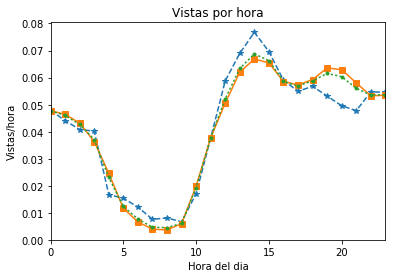

In [106]:
#Vistas fines de semana
hora_vistas_weekend=vistas.loc[vistas['diaString'].isin(['Sábado','Domingo'])]
hora_vistas_weekend = hora_vistas_weekend['hour'].value_counts(normalize=True)
hora_vistas_weekend = hora_vistas_weekend.sort_index()
#Vistas en la semana
hora_vistas_week=vistas.loc[vistas['diaString'].isin(['Sábado','Domingo'])==False]
hora_vistas_week = hora_vistas_week['hour'].value_counts(normalize=True)
hora_vistas_week = hora_vistas_week.sort_index()
#Plots
hora_vistas_weekend.plot.line(title='Vistas por hora',marker='*',linestyle='--') 
hora_vistas_week.plot.line(title='Vistas por hora',marker='s',linestyle='-') 
hora_vistas.plot.line(title='Vistas por hora',marker='.',linestyle=':') 
plt.ylabel('Vistas/hora')
plt.xlabel('Hora del dia')

<class 'pandas.core.frame.DataFrame'>


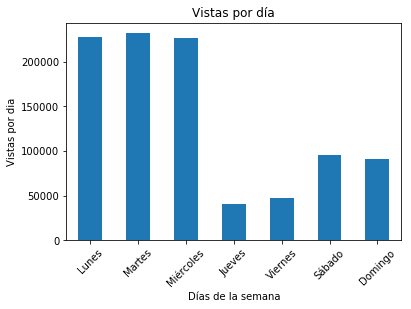

In [107]:
diaString_vistas= vistas['diaString'].value_counts().reset_index()
diaString_vistas.columns = ['Días de la semana', 'count'] 
print(type(diaString_vistas))

dias = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado', 'Domingo']
mapping = {dia: i for i, dia in enumerate(dias)}
key = diaString_vistas['Días de la semana'].map(mapping)

diaString_vistas = diaString_vistas.iloc[key.argsort()].set_index('Días de la semana')
diaString_vistas.plot.bar(title='Vistas por día', rot=45, legend=False)  
plt.ylabel('Vistas por dia')

## Exploramos el cuarto set de datos disponibles: Postulaciones a avisos


Utilizamos el mismo enfoque empleado para las vistas, y concluimos en base a ambos resultados:
     
La actividad a través del día sigue un patrón similar en su forma, sin embargo el pico se encuentra en horas previas al reportado para las vistas. Se habría esperado el efecto contrario, esperando que quien visite luego se postule. Esto no se condice con la información relevada, sin embargo podemos afirmar que el pico de uso de los servicios se encuentran entre las 8 am y 14 pm, tanto para vistas o postulaciones.

Respecto a las postulaciones a lo largo de la semana, también observamos un patrón similar respecto a las vistas, sin embargo la caída pasada la media semana es mucho menos pronunciada; de hecho, la actividad de postulaciones en días jueves y viernes es superior a la de fines de semana, cosa que no sucede con las vistas. 
     

In [108]:
postulaciones = pd.read_csv('Data/fiuba_4_postulaciones.csv',parse_dates=['fechapostulacion'])
postulaciones = postulaciones.rename(columns={'fechapostulacion': 'fechapost'})
print(postulaciones.shape)
print(postulaciones.dtypes)
postulaciones.head(3)

(3401623, 3)
idaviso                  int64
idpostulante            object
fechapost       datetime64[ns]
dtype: object


,idaviso,idpostulante,fechapost
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47


In [109]:
postulaciones.isnull().sum(axis=0)

idaviso         0
idpostulante    0
fechapost       0
dtype: int64

In [110]:
postulaciones['year']  = postulaciones['fechapost'].dt.year
postulaciones['month'] = postulaciones['fechapost'].dt.month
postulaciones['day']   = postulaciones['fechapost'].dt.day
postulaciones['hour']  = postulaciones['fechapost'].dt.hour
postulaciones['dow']   = postulaciones['fechapost'].dt.dayofweek
postulaciones.head(1)

,idaviso,idpostulante,fechapost,year,month,day,hour,dow
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,15,16,0


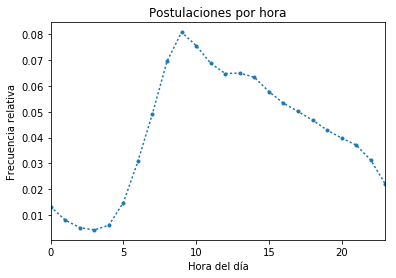

In [111]:
hora_postulaciones = postulaciones['hour'].value_counts(normalize=True)
hora_postulaciones = hora_postulaciones.sort_index()
hora_postulaciones.plot.line(title='Postulaciones por hora',marker='.',linestyle=':')
plt.ylabel('Frecuencia relativa')
plt.xlabel('Hora del día')

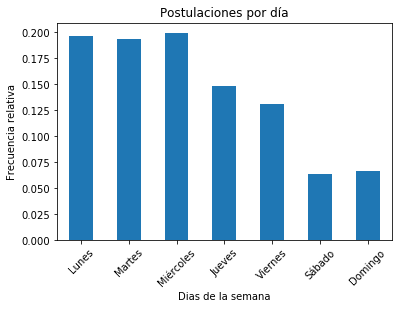

In [112]:
dia_postulaciones = postulaciones['dow'].value_counts(normalize=True).reset_index()
dia_postulaciones = dia_postulaciones.sort_values('index', ascending=True)
dia_postulaciones.columns = ['Dias de la semana', 'count'] 
#The day of the week with Monday=0, Sunday=6
dia_postulaciones['Dias de la semana']   = dia_postulaciones['Dias de la semana'].\
map({0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'})

dia_postulaciones.plot.bar(x='Dias de la semana',title='Postulaciones por día',rot=45, legend=False)  
plt.ylabel('Frecuencia relativa')
#print((dia_postulaciones))

In [113]:
numpostulantes = postulaciones['idpostulante'].value_counts()
print("Recordemos que la dimension de postulantes es: ",postulantes.shape)
postulantes.head(10)

Recordemos que la dimension de postulantes es:  (200888, 7)


,idpostulante,educacion,estado,educacion_estado,fechanacimiento,sexo,edad
0,0z5VvGv,Secundario,Graduado,Secundario_Graduado,1987-10-18,MASC,30.0
1,0zB026d,Terciario/Técnico,Graduado,Terciario/Técnico_Graduado,1978-02-23,FEM,40.0
2,0zB03O9,Terciario/Técnico,En Curso,Terciario/Técnico_En Curso,1987-07-04,FEM,30.0
3,0zB08lq,Secundario,Graduado,Secundario_Graduado,1972-06-09,MASC,45.0
4,0zB0NWY,Universitario,Graduado,Universitario_Graduado,1987-09-20,FEM,30.0
5,0zB0Xwd,Universitario,En Curso,Universitario_En Curso,1989-09-18,FEM,28.0
6,0zB0YGv,Universitario,Abandonado,Universitario_Abandonado,1989-02-25,FEM,29.0
7,0zB0e1d,Universitario,En Curso,Universitario_En Curso,1990-11-17,MASC,27.0
8,0zB0eDY,Terciario/Técnico,Graduado,Terciario/Técnico_Graduado,1994-06-21,FEM,23.0
9,0zB0qGE,Secundario,Graduado,Secundario_Graduado,1979-08-16,MASC,38.0


In [114]:
postulantes.shape

(200888, 7)

## Exploramos el quinto set de datos disponibles: Avisos.

El mismo no provee información adicional para el análisis.

In [115]:
#Previsualizamos primeras filas (DS Avisos_online)
avisos_online = pd.read_csv('Data/fiuba_5_avisos_online.csv')
print(avisos_online.shape)
avisos_online.head(3)

(5028, 1)


,idaviso
0,1112355872
1,1112335374
2,1112374842


## Exploramos el sexto set de datos disponibles: Avisos (detalle)
     
Luego de una breve inspección visual, nos disponemos a explorar las postulaciones respecto a las variables presentadas en este set de datos:

In [116]:
#Previsualizamos primeras filas (DS Avisos_detalle)
avisos_detalle = pd.read_csv('Data/fiuba_6_avisos_detalle.csv')
print(avisos_detalle.shape)
avisos_detalle.head(3)

(13534, 11)


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL


In [117]:
print(avisos_detalle['idaviso'].astype('object').describe())
print(avisos_detalle.shape)

count          13534
unique         13534
top       1112335209
freq               1
Name: idaviso, dtype: int64
(13534, 11)


In [118]:
#Obtenemos cantidad de valores nulos (total campos)
print('valores nulos totales= ',sum(avisos_detalle.isnull().sum(axis=0)))
#Ante la gran cantidad de valores nulos, observamos en que variables se encuentran para considerar su posterior tratamiento
print(avisos_detalle.isnull().sum())

valores nulos totales=  26154
idaviso                     0
idpais                      0
titulo                      0
descripcion                 0
nombre_zona                 0
ciudad                  13487
mapacalle               12662
tipo_de_trabajo             0
nivel_laboral               0
nombre_area                 0
denominacion_empresa        5
dtype: int64


Consideramos eliminar las variables 'ciudad' y 'mapacalle', 
al encontrarse más del 90% de sus datos incompletos.

In [119]:
avisos_detalle.drop('ciudad',axis=1,inplace=True) #Inplace hace que no tenga que reasignar
avisos_detalle.drop('mapacalle',axis=1,inplace=True)

In [120]:
avisos_detalle.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [121]:
avisos_detalle.shape

(13534, 9)

Exploramos la distribución zonal de los empleos, donde observamos que sólo un 15% de ellos pertenecen a CABA, mientras que el porcentaje restante lo hace respecto al GBA.

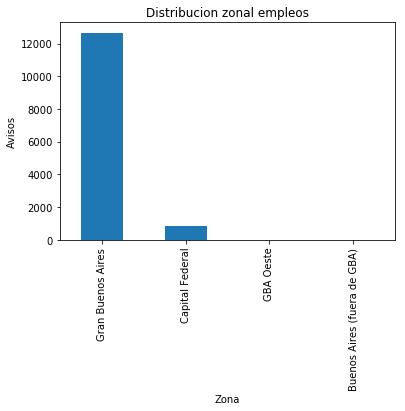

In [122]:
avisos_detalle['nombre_zona'].value_counts()
avisos_detalle['nombre_zona'].value_counts().plot.bar(title='Distribucion zonal empleos')
plt.ylabel('Avisos')
plt.xlabel('Zona')

También nos interesa conocer el tipo de trabajo ofrecido.
En base a la visualización que se encuentra a continuación, podemos ver que más del 85% de la oferta refiere a empleos "Full time". 
Por otro lado, el 15% restante ofrece trabajos en modalidades menos convencionales o de medio tiempo.

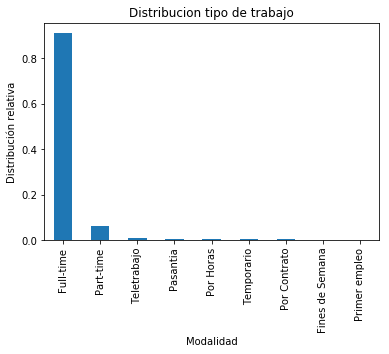

In [123]:
avisos_detalle['tipo_de_trabajo'].value_counts(normalize=True)
avisos_detalle['tipo_de_trabajo'].value_counts(normalize=True).plot.bar(title='Distribucion tipo de trabajo')
plt.ylabel('Distribución relativa')
plt.xlabel('Modalidad')

Proseguimos visualizando la jerarquía o nivel de experiencia requerida en cada puesto; observamos que cerca del 70% de los puestos requeridos son para posiciones senior o semi-senior. Por otro lado, existen pocas búsquedas para niveles junior en la plataforma, y muy pocas búsquedas de niveles jerárquicos.

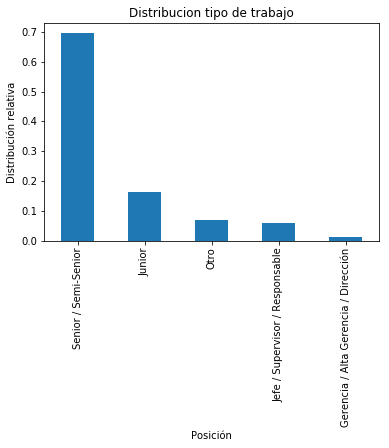

In [124]:
avisos_detalle['nivel_laboral'].value_counts(normalize=True)
avisos_detalle['nivel_laboral'].value_counts(normalize=True).plot.bar(title='Distribucion tipo de trabajo')
plt.ylabel('Distribución relativa')
plt.xlabel('Posición')

En cuanto a las áreas del mercado, podemos observar a continuación que el sector de ventas lidera indiscutidamente las posiciones ofrecidas con un 12% del total ofertado, seguida por las áreas comerciales y administrativas. 

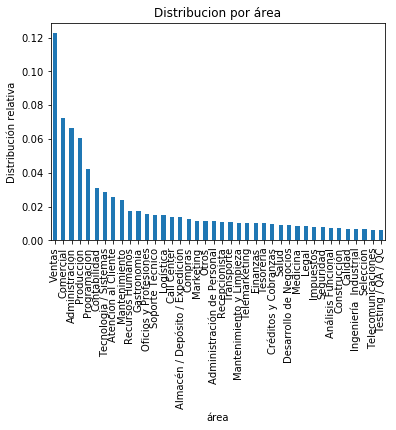

In [125]:
avisos_detalle['nombre_area'].value_counts(normalize=True).head(40).plot.bar(title='Distribucion por área')
plt.ylabel('Distribución relativa')
plt.xlabel('área')

Analizando ahora a las empresas oferentes, podemos observar que las empresas con mayor cantidad de avisos no son empresas que realicen contratación directa, sino consultoras (Randstad, Manpower, Grupo Gestión, etc.).
En base a este descubrimiento, proponemos a Zonajobs - de no hacerlo ya - ofrecer un tratamiento diferencial a estas compañias en cuanto a pricing, modalidad de carga de empleos (dada su masividad), y atención al cliente. 

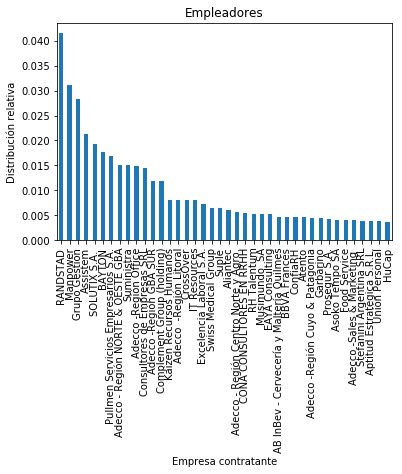

In [126]:
avisos_detalle['denominacion_empresa'].value_counts(normalize=True).head(40).plot.bar(title='Empleadores')
plt.ylabel('Distribución relativa')
plt.xlabel('Empresa contratante')

## Empezamos a Relacionar tablas de postulaciones y vistas

## Vistas vs. Postulaciones

Comenzamos por agrupar las postulaciones y las vistas por su id de aviso

In [127]:
print(postulaciones.shape)
postulaciones.head(3)

(3401623, 8)


,idaviso,idpostulante,fechapost,year,month,day,hour,dow
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,15,16,0
1,1111920714,NM5M,2018-02-06 09:04:50,2018,2,6,9,1
2,1112346945,NM5M,2018-02-22 09:04:47,2018,2,22,9,3


In [128]:
postulacionesAgrupadas =postulaciones['idaviso'].value_counts().to_frame()
postulacionesAgrupadas.reset_index(level=0,inplace=True)
postulacionesAgrupadas.columns.values[0]='idAviso'
postulacionesAgrupadas.columns.values[1]='CantPostulaciones'

postulacionesAgrupadas.head(3)

,idAviso,CantPostulaciones
0,1112033906,9932
1,1112334791,9787
2,1112204682,9244


In [129]:
print(vistas.shape)
vistas.head(3)

(961897, 10)


,idAviso,fechavista,idpostulante,year,month,day,hour,dow,dayString,diaString
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018,2,23,18,4,Friday,Viernes
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018,2,23,18,4,Friday,Viernes
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018,2,23,18,4,Friday,Viernes


In [130]:
vistasAgrupadas =vistas['idAviso'].value_counts().to_frame()
vistasAgrupadas.reset_index(level=0,inplace=True)
vistasAgrupadas.columns.values[0]='idAviso'
vistasAgrupadas.columns.values[1]='CantVistas'

vistasAgrupadas.head(3)


,idAviso,CantVistas
0,1112363488,4169
1,1112359836,4120
2,1112352317,4003


Ahora las juntamos para relacionar para un mismo aviso cuantas vistas y cuantas postulaciones tuvo.

In [131]:
vistaPostulacionXaviso = vistasAgrupadas.merge(postulacionesAgrupadas)
vistaPostulacionXaviso['PostOverVistas']= \
vistaPostulacionXaviso.CantPostulaciones / vistaPostulacionXaviso.CantVistas
vistaPostulacionXaviso.head(3)


,idAviso,CantVistas,CantPostulaciones,PostOverVistas
0,1112363488,4169,1244,0.298393
1,1112359836,4120,4454,1.081068
2,1112352317,4003,4194,1.047714


In [132]:
serie = vistaPostulacionXaviso['PostOverVistas'].sort_values(ascending = False)
serie.head()

6307    6113.0
6502    3549.0
6042    2972.0
6199    2664.0
6329    2305.0
Name: PostOverVistas, dtype: float64

Hacemos un scatter plot de estas variables

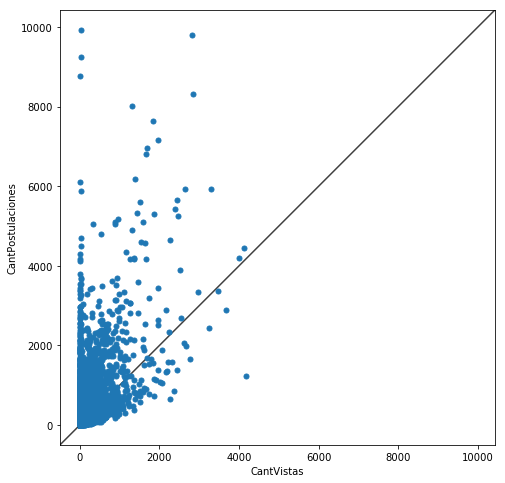

In [133]:
vistaPostulacionXavisoRestringido = vistaPostulacionXaviso.loc[(vistaPostulacionXaviso['CantVistas'] <= 10000) ]

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(vistaPostulacionXavisoRestringido['CantVistas'], vistaPostulacionXavisoRestringido['CantPostulaciones'], s=25,  cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel('CantVistas')
ax.set_ylabel('CantPostulaciones')

Se observa claramente la necesidad de revisar los outliers y tambien analizar que sucede los casos donde hay muy pocas visitas (grafico inferior vistas=1) y una enorme cantidad de postulaciones, algo que a-priori no nos parece muy lógico

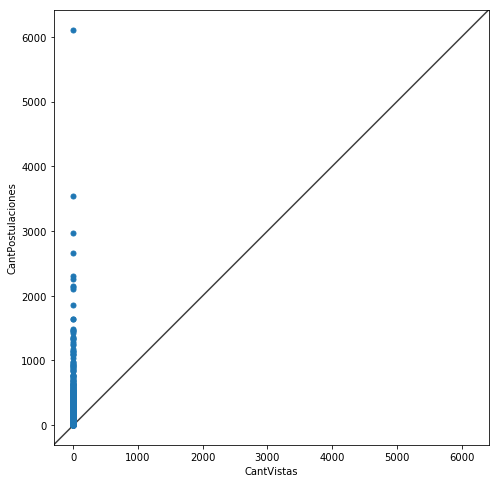

In [134]:
vistaPostulacionXavisoRestringido = vistaPostulacionXaviso.loc[(vistaPostulacionXaviso['CantVistas'] <= 1) ]

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(vistaPostulacionXavisoRestringido['CantVistas'], vistaPostulacionXavisoRestringido['CantPostulaciones'], s=25,  cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel('CantVistas')
ax.set_ylabel('CantPostulaciones')

## Conclusiones y guías para futuros trabajos:
    
* Dado que la mayor parte de los postulantes se encuentran entre los 20 y 35 años, recomendamos a Zonajobs considerar la opción de desarrollar una aplicación para teléfonos móviles. Esto los acercaría más a su consumidor promedio y a su vez les permitiría generar alertas y obtener datos que de forma más sencilla.
* Debido a que las empresas con mayor cantidad de avisos son consultoras (Randstad, Manpower, Grupo Gestión, etc.), se propone que Zonajobs realice un tratamiento especial de dichos clientes.
* Con el fin de aumentar y mejorar el uso de Zonajobs, se puede ofrecer un servicio premium a los postulantes. Dicho servivio les brindaría opciones como mayor visibilidad, revisión y asistencia en el armado de CV, ofrecimiento de cursos con descuentos, etc.
* Recomendamos a Zonajobs generar alertas y/o notificaciones en los días de menor tráfico, a modo de atraer postulantes hacia la web. Esto puede generar mayores ganancias respecto al tráfico web.
* A pesar de las varias categorías de trabajo, consideramos que aumentar en mayor medida el segmentamiento de dichas categorías puede llegar a mejorar la experiencia del usuario.
    
